# Investment Decision
## Author: Snigdhayan Mahanta

`Monte Carlo Simulation` can be a powerful technique to get a quantitive idea about future outcomes. Suppose an investor has 10000 EUR to invest in a project (e.g., a startup). For the investor there are two options:
1. Option 1 - low rate of return and low risk of failure
2. Option 2 - high rate of return and high risk of failure

I used `Monte Carlo Simulation` using the `MonteCarlo` package of `R` to compute the average returns for the two options. I am not advocating any investment strategy based on this simulation. Please read the advisory at the end.

In [1]:
library(MonteCarlo, quietly = TRUE)

In [2]:
# Define a function that calculates the ROI of an investment based on rate of return and risk of failure
ROI <- function(rate, risk, investment){
    
  # add some variability to real risk of failure
  real_risk <- risk
  x <- sample(rnorm(100, risk, risk/10), size=1)
  if (x > 0 & x < 100) {real_risk <- x}
    
  # generate investment outcome
  outcome <- sample(0:1, size=1, prob=c((real_risk/100), 1-(real_risk/100))) # 0 = failure, 1 = success
  
  # add some variability to real rate of return
  real_rate <- abs(sample(rnorm(100, rate, rate/100), size=1))
    
  # calculate ROI
  result <- ((real_rate/100)*investment*outcome)
  
  # return result:
  return(list("ROI" = result))
}

In [3]:
# define parameter grid:
investment <- 10000 # 10k EUR to invest

# Rate of return as percentage
low_rate <- 80000 # 80000% rate of return
high_rate <- 120000 # 120000% rate of return

# Risk of failure as percentage
low_risk <- 70 # 70% risk of failure
high_risk <- 80 # 80% risk of failure

rate <- c(low_rate, high_rate)
risk <- c(low_risk, high_risk)

In [4]:
# collect parameter grids in list:
param_list=list("rate" = rate, "risk" = risk, "investment" = investment)

In [5]:
# run simulation:
repetitions <- 100
MC_result<-MonteCarlo(func = ROI, nrep = repetitions, param_list = param_list)
summary(MC_result)

Grid of  4  parameter constellations to be evaluated. 
 
Progress: 
 
  |======================================================================| 100%
 
Simulation of function: 

function(rate, risk, investment){
    
  # add some variability to real risk of failure
  real_risk <- risk
  x <- sample(rnorm(100, risk, risk/10), size=1)
  if (x > 0 & x < 100) {real_risk <- x}
    
  # generate investment outcome
  outcome <- sample(0:1, size=1, prob=c((real_risk/100), 1-(real_risk/100))) # 0 = failure, 1 = success
  
  # add some variability to real rate of return
  real_rate <- abs(sample(rnorm(100, rate, rate/100), size=1))
    
  # calculate ROI
  result <- ((real_rate/100)*investment*outcome)
  
  # return result:
  return(list("ROI" = result))
}
<bytecode: 0x000000001f4764b0>

Required time: 0.07 secs for nrep = 100  repetitions on 1 CPUs 

Parameter grid: 

       rate : 80000 120000 
       risk : 70 80 
 investment : 10000 

 
1 output arrays of dimensions: 2 2 1 100

In [6]:
# Aggregate results
return1 <- numeric(repetitions) # low rate, low risk
return2 <- numeric(repetitions) # high rate, high risk

for (i in c(1:repetitions)) {
    return1[i] <- MC_result$results$ROI[4*(i-1)+1]
    return2[i] <- MC_result$results$ROI[4*(i-1)+4]
}

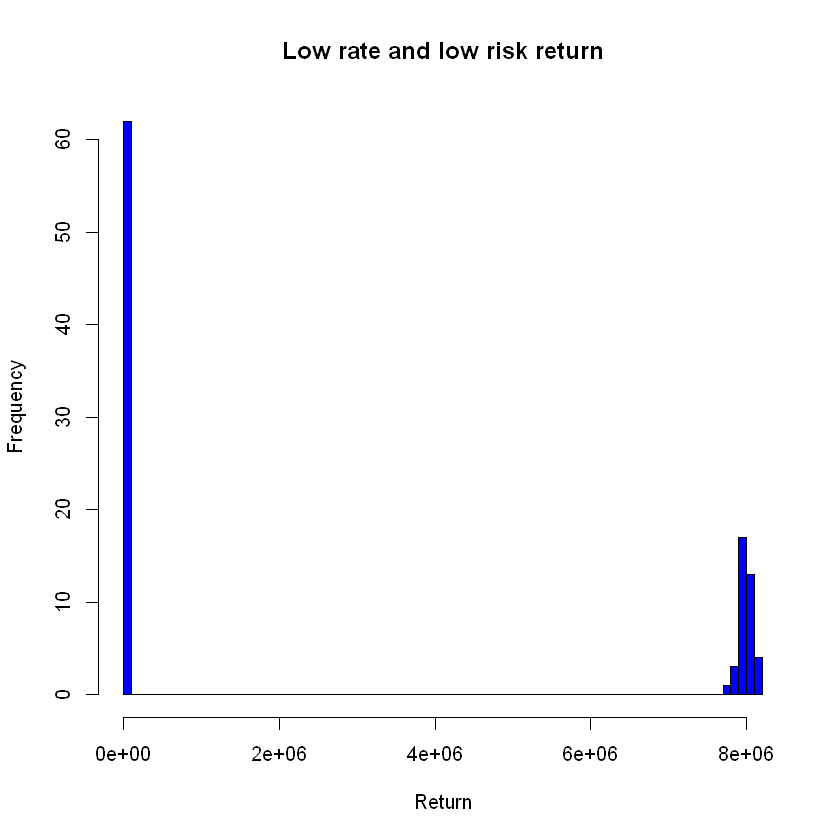

In [7]:
# Histogram of option 1
step1 <- 100000
upper1 <- max(return1) + step1

hist(return1, 
     main = "Low rate and low risk return", 
     xlab = "Return", 
     col = "blue",
     breaks = seq(0, upper1, by=step1), 
     xlim = c(0, upper1))

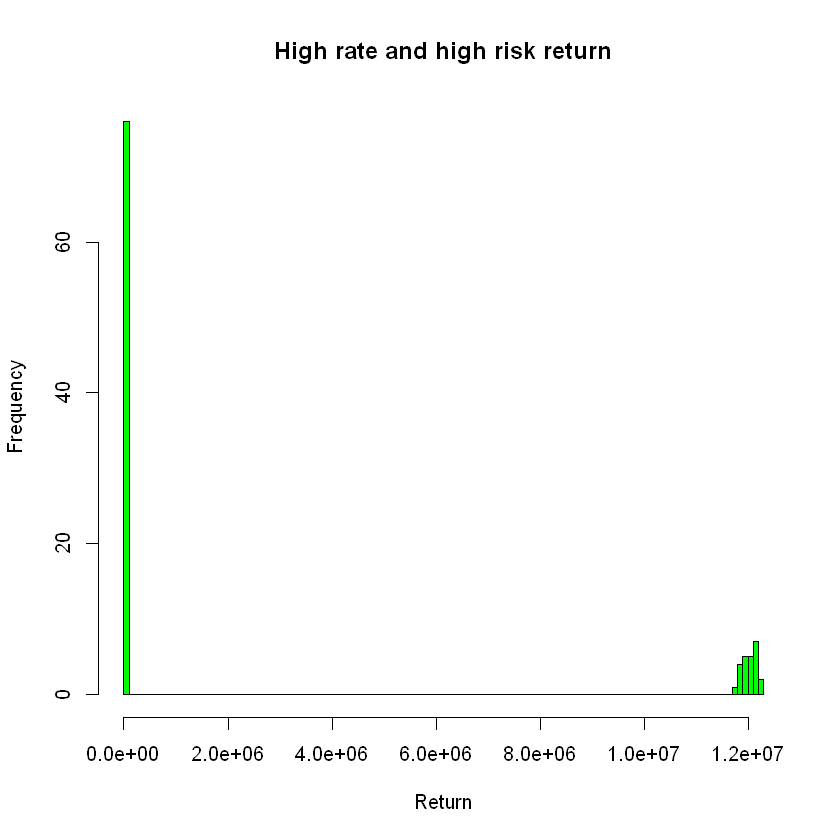

In [8]:
# Histogram of option 2
step2 <- 100000
upper2 <- max(return2) + step2

hist(return2, 
     main = "High rate and high risk return", 
     xlab = "Return", 
     col = "green",
     breaks = seq(0, upper2, by=step2), 
     xlim = c(0, upper2))

In [9]:
# Average return - low rate and low risk
print(paste0("Average return ", "(Rate = ", low_rate, "%, Risk = ", low_risk, "%): ", round(mean(return1))))

[1] "Average return (Rate = 80000%, Risk = 70%): 3036834"


In [10]:
# Average return - high rate and high risk
print(paste0("Average return ", "(Rate = ", high_rate, "%, Risk = ", high_risk, "%): ", round(mean(return2))))

[1] "Average return (Rate = 120000%, Risk = 80%): 2885258"


One can easily change the simulation parameters and analyze different scenarios. For an individual investor this information is merely of academic interest and I would refrain from advising anything based on these results. However, this simulation capability can be helpful for a venture capital firm that can invest 10000 EUR in many independent startups.